In [ ]:
# TimeGPT versus other neural methods

In [ ]:
# Tags

In [ ]:
# References
[TimeGPT](https://towardsdatascience.com/timegpt-the-first-foundation-model-for-time-series-forecasting-bf0a75e63b3a)

In [35]:
import os

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, PatchTST

from neuralforecast.losses.numpy import mae, mse

from nixtlats import TimeGPT

%matplotlib inline

# settings
import warnings
warnings.filterwarnings('ignore')
#print all rows of a df in ipython shell 
pd.set_option('display.max_rows', None)
#print all columns of a df in ipython shell 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
pd.set_option("display.precision", 6)

# optional
#pd.set_option('display.max_columns',100)
sns.set_style('darkgrid')

In [3]:
with open("data/timegpt_api_key.txt", 'r') as file:
        API_KEY = file.read()

In [129]:
import datetime
from datetime import datetime

path = os.path.abspath(os.getcwd())
my_file = 'webviews.csv'
my_file_f = 'eva_1.csv'
my_file_c = 'eva_2.csv'
my_file_fm = 'eva_10.csv'
my_file_h = 'ETTh1_original.csv'
my_file_4 = 'eva_4.csv'

input_path = os.path.join(path, 'data', my_file_4)
df = pd.read_csv(input_path)
#df = pd.read_csv(input_path,  parse_dates=["_time"])
#df['time'] = df['_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
#df['time'] = df['_time'].apply(lambda x: datetime.strptime(x, "%Y-%d-%m %H:%M:%S"))
df['_time'] = df['_time'].values.astype('<M8[m]')

#df['time'] = pd.to_datetime(df['_time'])

df.head()

,_time,count
0,2023-09-25 20:00:00,54133
1,2023-09-25 21:00:00,46184
2,2023-09-25 22:00:00,37215
3,2023-09-25 23:00:00,36460
4,2023-09-26 00:00:00,34806


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   _time   570 non-null    datetime64[s]
 1   count   570 non-null    int64        
dtypes: datetime64[s](1), int64(1)
memory usage: 9.0 KB


In [ ]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%d-%m %H:%M:%S")

In [ ]:
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%d-%m %H:%M:%S")
df = pd.read_csv(input_path,
                 parse_dates=['_time'],
                date_parser=custom_date_parser)
df.info()

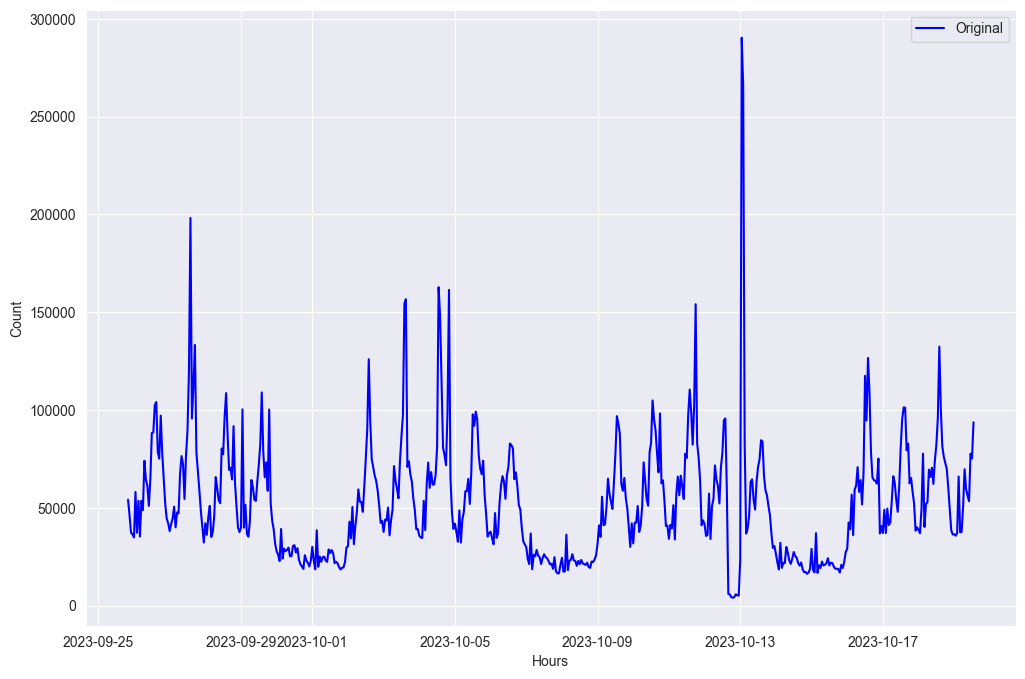

In [164]:
#published_dates = df[df['published'] == 1]

plt.subplots(figsize=(12,8))

plt.plot(df['_time'], df['count'], color='blue', label='Original')
#ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red', label='New article')
#plt.plot(df['_time'], df['normalised'], color='red', label='Normalised')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.legend(loc='best')

#plt.autofmt_xdate()


#plt.tight_layout()

In [94]:
from nixtlats import TimeGPT

timegpt = TimeGPT(token=API_KEY)

timegpt.validate_token()

INFO:nixtlats.timegpt:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

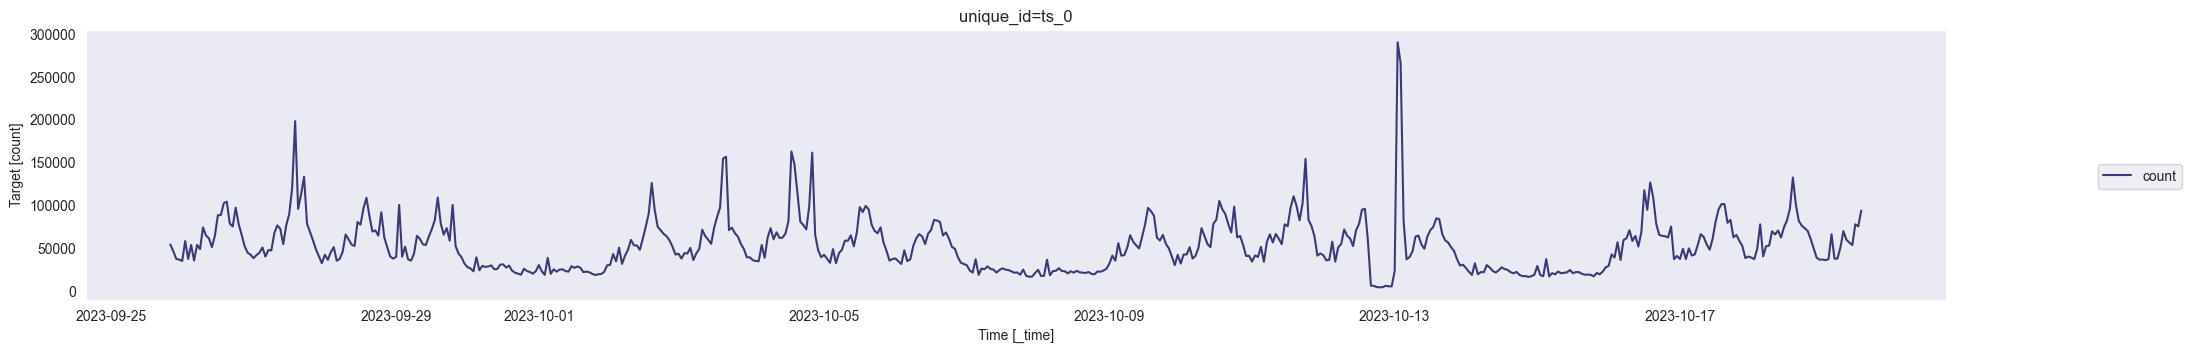

In [150]:
timegpt.plot(df, time_col='_time', target_col='count')

In [155]:
timegpt_fcst_df = timegpt.forecast(df=df, h=12, freq='h', time_col='_time', target_col='count')
timegpt_fcst_df
#df.tail(5)

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,_time,TimeGPT
0,2023-10-19 14:00:00,93069.8
1,2023-10-19 15:00:00,91182.2
2,2023-10-19 16:00:00,83539.8
3,2023-10-19 17:00:00,80987.8
4,2023-10-19 18:00:00,83551.5
5,2023-10-19 19:00:00,87042.2
6,2023-10-19 20:00:00,85860.0
7,2023-10-19 21:00:00,84161.5
8,2023-10-19 22:00:00,78709.1
9,2023-10-19 23:00:00,82680.9


In [161]:
timegpt_anomalies_df = timegpt.detect_anomalies(df, time_col='_time', target_col='count', freq='h', level=60)

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Anomaly Detector Endpoint...


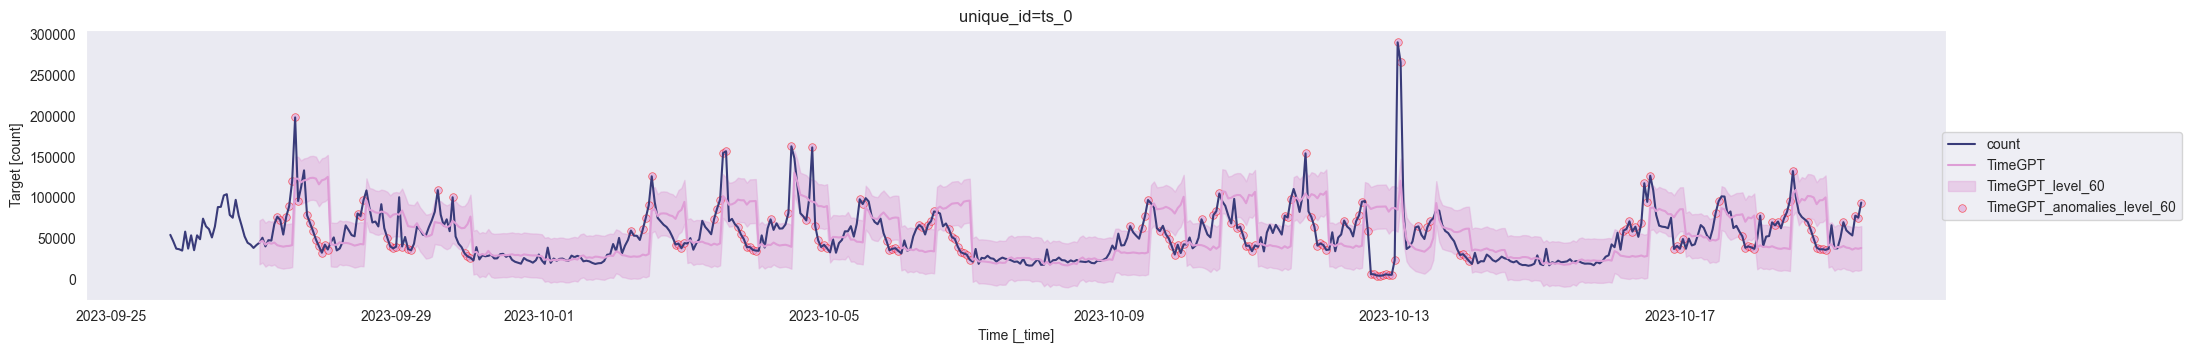

In [162]:
timegpt.plot(df, 
             timegpt_anomalies_df,
             time_col='_time', 
             target_col='count')

In [ ]:
timegpt.plot(df, timegpt_fcst_df, time_col='_time', target_col='count')

In [ ]:
timegpt_fcst_df = timegpt.forecast(df=df, h=6, time_col='_time', target_col='count', freq='W')
timegpt.plot(df, timegpt_fcst_df, time_col='_time', target_col='count')

In [146]:
timegpt_fcst_df

,_time,TimeGPT
0,2023-10-19 14:00:00,93069.8
1,2023-10-19 15:00:00,91182.2
2,2023-10-19 16:00:00,83539.8
3,2023-10-19 17:00:00,80987.8
4,2023-10-19 18:00:00,83551.5
5,2023-10-19 19:00:00,87042.2


In [ ]:
df_time_index = df.set_index('_time')
df_time_index.index = pd.DatetimeIndex(df_time_index.index, freq='min')
timegpt.forecast(df=df, h=36, time_col='_time', target_col='count').head()

In [ ]:
from datetime import datetime
def convert_datetime(dt):
    return datetime.strftime(dt, '%Y-%m-%d %H:%M-%S')

df['_time']= df ['_time'].apply(convert_datetime)

In [ ]:
timegpt.plot(df, timegpt_fcst_df, time_col='_time', target_col='count')

In [124]:
pm_df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/peyton_manning.csv')
timegpt_anomalies_df = timegpt.detect_anomalies(pm_df, time_col='timestamp', target_col='value', freq='D')
timegpt_anomalies_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Anomaly Detector Endpoint...


,timestamp,anomaly,TimeGPT-lo-99,TimeGPT,TimeGPT-hi-99
0,2008-01-10,0,6.9,8.2,9.5
1,2008-01-11,0,6.9,8.2,9.4
2,2008-01-12,0,6.8,8.1,9.4
3,2008-01-13,0,7.6,8.9,10.2
4,2008-01-14,0,7.7,9.0,10.3


In [134]:
timegpt_anomalies_df = timegpt.detect_anomalies(df, time_col='_time', target_col='count', freq='h')
timegpt_anomalies_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Anomaly Detector Endpoint...


,_time,anomaly,TimeGPT-lo-99,TimeGPT,TimeGPT-hi-99
0,2023-09-27 02:00:00,0,-37487.2,44924.4,127335.9
1,2023-09-27 03:00:00,0,-35383.4,47028.1,129439.7
2,2023-09-27 04:00:00,0,-40320.1,42091.5,124503.0
3,2023-09-27 05:00:00,0,-37919.5,44492.1,126903.6
4,2023-09-27 06:00:00,0,-39139.3,43272.2,125683.8


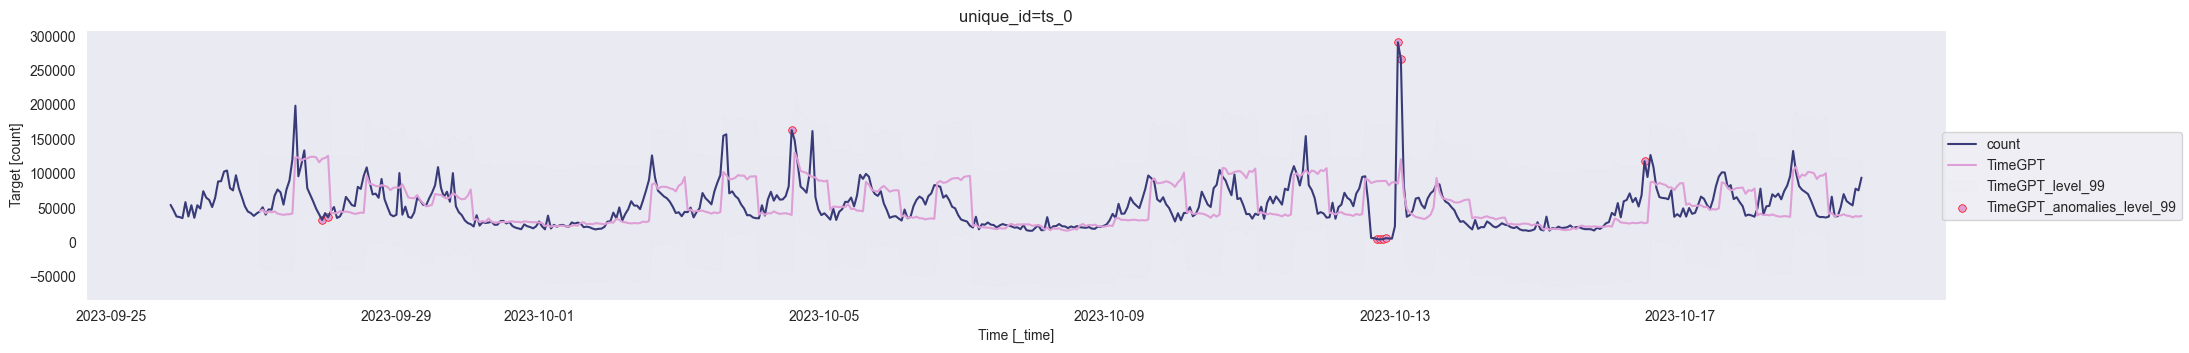

In [137]:
timegpt.plot(df, 
             timegpt_anomalies_df,
             time_col='_time', 
             target_col='count')

In [126]:
pm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  2905 non-null   object 
 1   value      2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Anomaly Detector Endpoint...


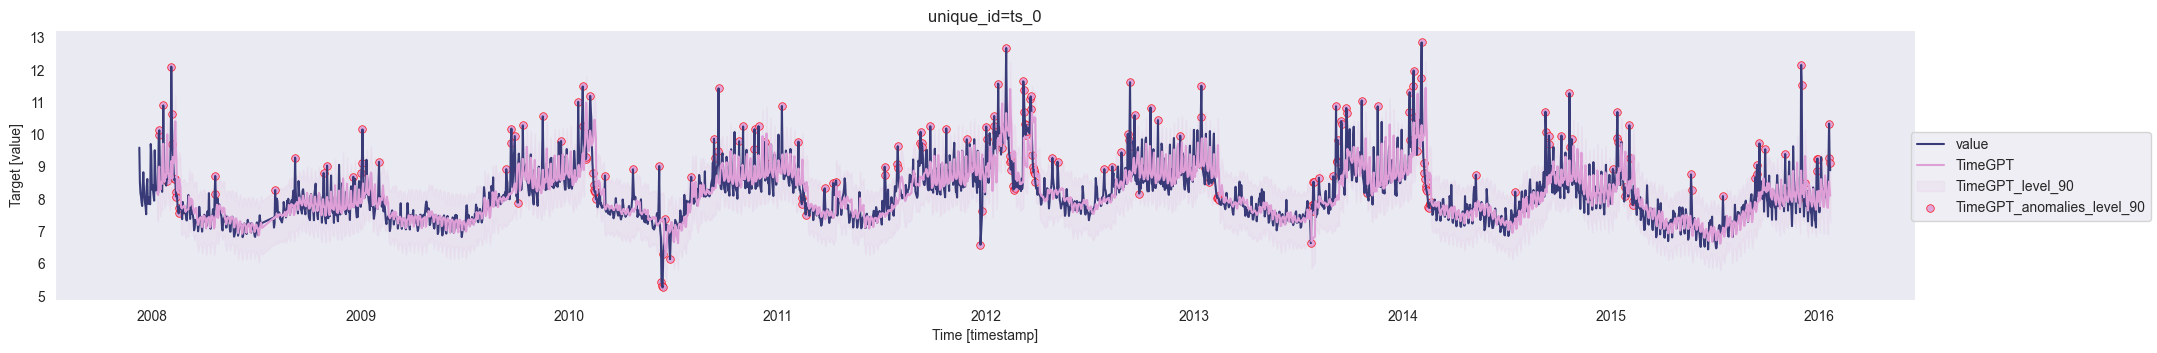

In [125]:
timegpt_anomalies_df = timegpt.detect_anomalies(pm_df, time_col='timestamp', target_col='value', freq='D', level=90)
timegpt.plot(pm_df, 
             timegpt_anomalies_df,
             time_col='timestamp', 
             target_col='value')

In [111]:
timegpt_fcst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   _time    12 non-null     object 
 1   TimeGPT  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


In [78]:
df.tail(4)

,_time,count,time
566,2023-10-19 10:00:00+00:00,53366,2023-10-19 10:00:00+00:00
567,2023-10-19 11:00:00+00:00,77627,2023-10-19 11:00:00+00:00
568,2023-10-19 12:00:00+00:00,75220,2023-10-19 12:00:00+00:00
569,2023-10-19 13:00:00+00:00,93722,2023-10-19 13:00:00+00:00


In [48]:
df_temp = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df_temp.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [139]:
timegpt_fcst_df = timegpt.forecast(df=df, h=12, freq='168h', time_col='_time', target_col='count')
timegpt_fcst_df

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,_time,TimeGPT
0,2023-10-23,35170.1
1,2023-10-30,38263.9
2,2023-11-06,36266.1
3,2023-11-13,35203.4
4,2023-11-20,38739.5
5,2023-11-27,39536.3
6,2023-12-04,40837.6
7,2023-12-11,39981.5
8,2023-12-18,40288.1
9,2023-12-25,31308.6


# OLD

In [ ]:
published_dates = df[df['published'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['ds'], df['y'])
ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red', label='New article')
ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)])

fig.autofmt_xdate()


plt.tight_layout()

In [8]:
train = df[:-168]
test = df[-168:]

print(train.shape)
print(test.shape)

(1213, 5)
(168, 5)


In [ ]:
df.iloc[:1213]

In [10]:
# TimeGPT
future_exog = test[['unique_id', 'ds', 'published', 'is_holiday']]

timegpt = TimeGPT(token=API_KEY)

timegpt_preds = []

for i in range(0, 162, 7):

    timegpt_preds_df = timegpt.forecast(
        df=df.iloc[:1213+i],
        X_df = future_exog[i:i+7],
        h=7,
        finetune_steps=10,
        id_col='unique_id',
        time_col='ds',
        target_col='y'
    )
    
    preds = timegpt_preds_df['TimeGPT']
    
    timegpt_preds.extend(preds)

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: D
INFO:nixtlats.timegpt:Using the following exogenous variables: published, is_holiday
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: D
INFO:nixtlats.timegpt:Using the following exogenous variables: published, is_holiday
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: D
INFO:nixtlats.timegpt:Using the following exogenous variables: published, is_holiday
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: D
INFO:nixtlats.timegpt:Using the following exogenous variables: p

In [11]:
# TimeGPT
test['TimeGPT'] = timegpt_preds
test.head()

,unique_id,ds,y,published,is_holiday,TimeGPT
1213,0,2023-04-28,1470,0.0,0,1446.3
1214,0,2023-04-29,1004,0.0,0,930.2
1215,0,2023-04-30,1051,0.0,0,1170.0
1216,0,2023-05-01,1333,0.0,0,1835.5
1217,0,2023-05-02,1778,0.0,0,1853.9


In [ ]:
#Forecasting with N-BEATS, N-HiTS and PatchTST

In [12]:
horizon = 7

models = [NHITS(h=horizon,
               input_size=5*horizon,
               max_steps=50),
         NBEATS(h=horizon,
               input_size=5*horizon,
               max_steps=50),
         PatchTST(h=horizon,
                 input_size=5*horizon,
                 max_steps=50)]

Seed set to 1
Seed set to 1
Seed set to 1


In [29]:
nf = NeuralForecast(models=models, freq='D')

In [30]:
future_exog = test[['unique_id', 'published', 'is_holiday']]

preds_df = nf.cross_validation(df=df, static_df=future_exog , step_size=7, n_windows=24)

Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Predicting: |                                                                                    | 0/? [00:00<…

Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Predicting: |                                                                                    | 0/? [00:00<…

Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Predicting: |                                                                                    | 0/? [00:00<…

In [33]:
# TimeGPT
preds_df['TimeGPT'] = test['TimeGPT']
preds_df['TimeGPT'] =timegpt_preds
preds_df['TimeGPT'].head(6)

0   1446.3
1    930.2
2   1170.0
3   1835.5
4   1853.9
5   1796.2
Name: TimeGPT, dtype: float64

In [34]:
test.to_csv('medium_views_test.csv', header=True, index=False)

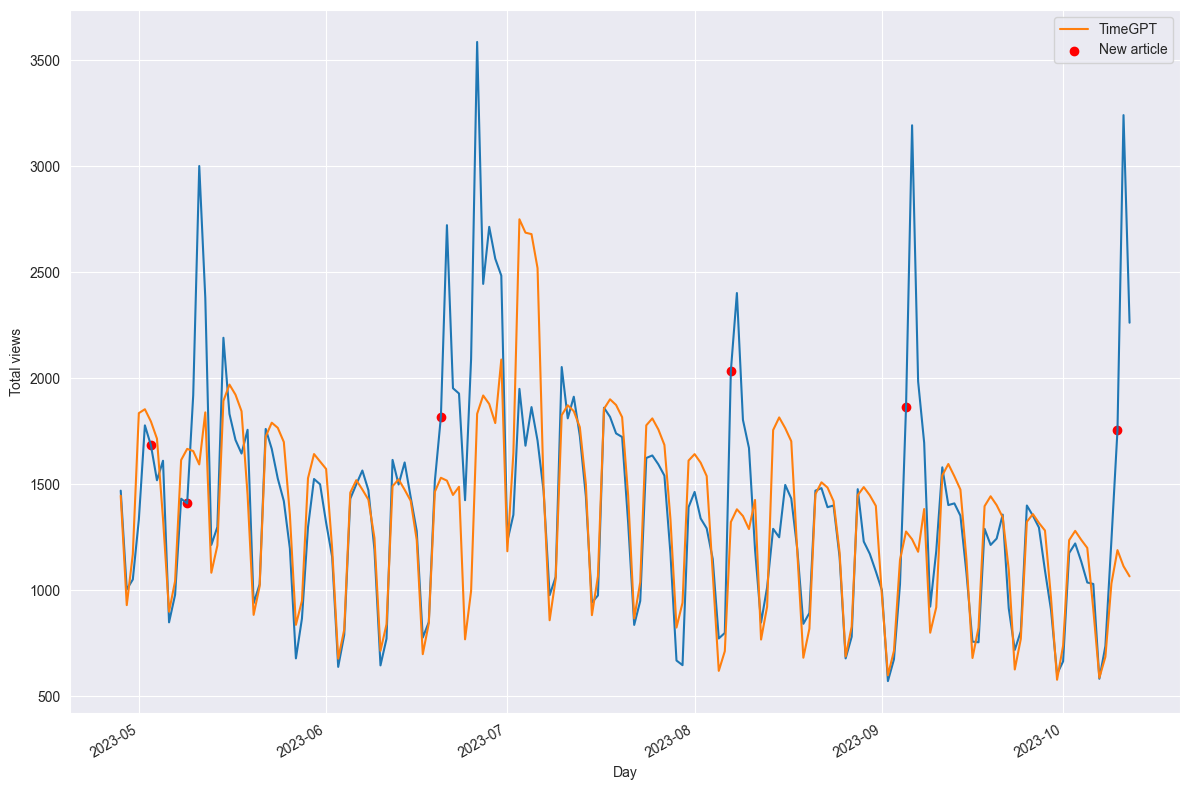

In [35]:
#TimeGPT
published_dates = test[test['published'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(test['ds'], test['y'])
ax.plot(test['ds'], test['TimeGPT'], label='TimeGPT')

ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red', label='New article')

ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')

fig.autofmt_xdate()

plt.tight_layout()

In [36]:
preds_df.sample(3)

,unique_id,ds,cutoff,NHITS,NBEATS,PatchTST,y,published,is_holiday,TimeGPT
166,0,2023-10-11,2023-10-05,1139.4,1231.9,1072.8,3241,0.0,0,1113.7
9,0,2023-05-07,2023-05-04,1072.7,1033.9,1066.0,979,0.0,0,1043.2
19,0,2023-05-17,2023-05-11,2883.0,2332.1,2185.4,1709,0.0,0,1922.6


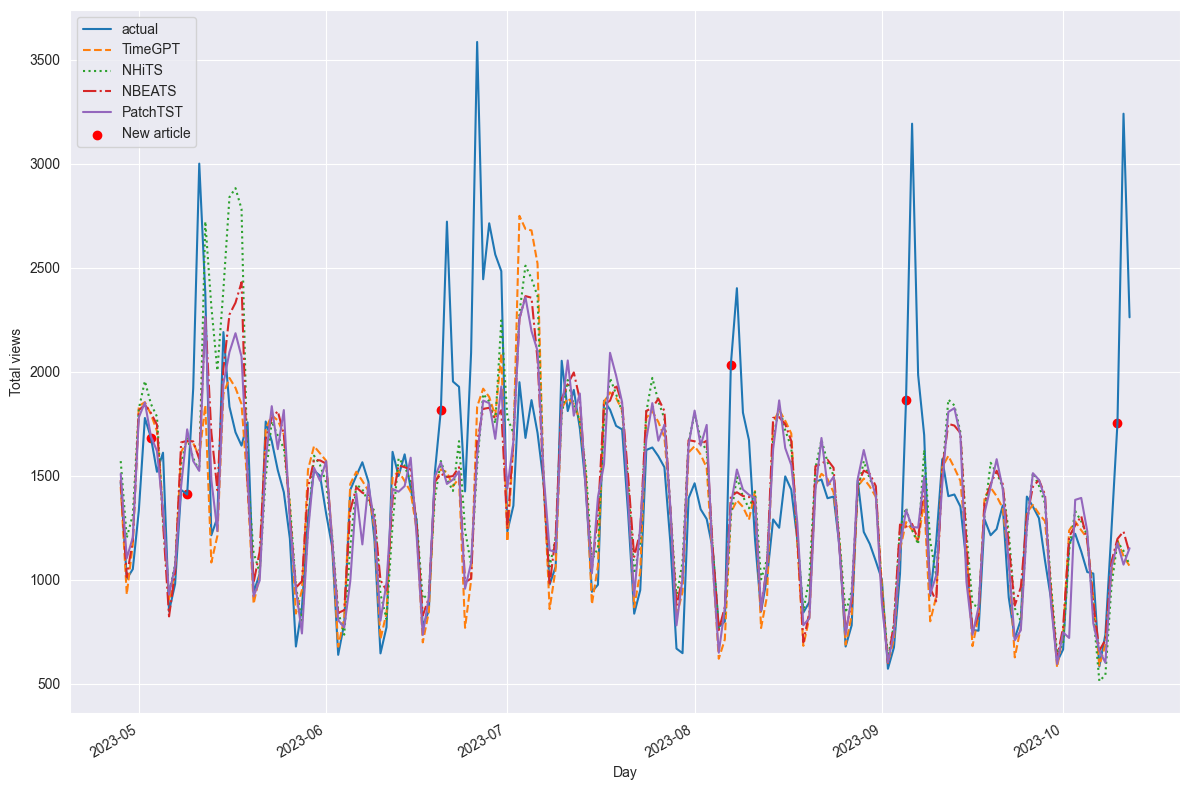

In [37]:
published_dates = test[test['published'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(preds_df['ds'], preds_df['y'], label='actual')
ax.plot(preds_df['ds'], preds_df['TimeGPT'], ls='--', label='TimeGPT')
ax.plot(preds_df['ds'], preds_df['NHITS'], ls=':', label='NHiTS')
ax.plot(preds_df['ds'], preds_df['NBEATS'], ls='-.', label='NBEATS')
ax.plot(preds_df['ds'], preds_df['PatchTST'], ls='-', label='PatchTST')

ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red', label='New article')

ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')

fig.autofmt_xdate()

plt.tight_layout()

In [39]:
preds_df = preds_df.round({
    'NHITS': 0,
    'NBEATS': 0,
    'PatchTST': 0,
    'TimeGPT': 0
})

preds_df.head()

,unique_id,ds,cutoff,NHITS,NBEATS,PatchTST,y,published,is_holiday,TimeGPT
0,0,2023-04-28,2023-04-27,1570.0,1480.0,1509.0,1470,0.0,0,1446.0
1,0,2023-04-29,2023-04-27,1202.0,1013.0,1103.0,1004,0.0,0,930.0
2,0,2023-04-30,2023-04-27,1313.0,1191.0,1204.0,1051,0.0,0,1170.0
3,0,2023-05-01,2023-04-27,1822.0,1816.0,1781.0,1333,0.0,0,1836.0
4,0,2023-05-02,2023-04-27,1955.0,1841.0,1853.0,1778,0.0,0,1854.0


In [40]:
data = {'N-HiTS': [mae(preds_df['NHITS'], preds_df['y']), mse(preds_df['NHITS'], preds_df['y'])],
       'N-BEATS': [mae(preds_df['NBEATS'], preds_df['y']), mse(preds_df['NBEATS'], preds_df['y'])],
       'PatchTST': [mae(preds_df['PatchTST'], preds_df['y']), mse(preds_df['PatchTST'], preds_df['y'])],
       'TimeGPT': [mae(preds_df['TimeGPT'], preds_df['y']), mse(preds_df['TimeGPT'], preds_df['y'])]
       }

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

metrics_df.style.highlight_min(color='lightgreen', axis=1)

,N-HiTS,N-BEATS,PatchTST,TimeGPT
mae,299.345238,266.494048,266.928571,244.630952
mse,218636.488095,182572.172619,184538.750000,180269.654762


In [ ]:
# Miscellous

In [ ]:
# transform unixtime to datetime
import datetime

dt = datetime.datetime.fromtimestamp(1693522800)

print(dt)
print(type(dt))
print(dt.tzinfo)

In [ ]:
daily_data = df.resample('D').mean()